<a href="https://colab.research.google.com/github/medaminechafii/deeplearning-projects/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D,Dropout,Input,GlobalMaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10

In [71]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train,x_test = x_train/255,x_test/255
y_test,y_train = y_test.reshape(-1),y_train.reshape(-1)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)


In [73]:
K = len(set(y_train))
print("number is :",K)

number is : 10


In [74]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomContrast(0.2)
])

In [75]:
i = Input(shape=x_train[0].shape)
x = data_augmentation(i)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

In [76]:
model = Model(i,x)


In [77]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.3071 - loss: 1.9352 - val_accuracy: 0.4503 - val_loss: 1.4932
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4533 - loss: 1.5047 - val_accuracy: 0.5241 - val_loss: 1.3585
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5284 - loss: 1.3204 - val_accuracy: 0.5525 - val_loss: 1.2853
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.5793 - loss: 1.1851 - val_accuracy: 0.5959 - val_loss: 1.1473
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6126 - loss: 1.1042 - val_accuracy: 0.6613 - val_loss: 0.9929
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6467 - loss: 1.0226 - val_accuracy: 0.6129 - val_loss: 1.1490
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.6597 - loss: 0.9768 - val_accuracy: 0.6862 - val_loss: 0.9254
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6815 -

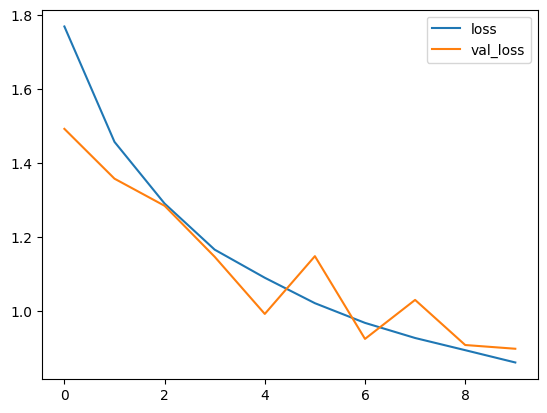

In [79]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

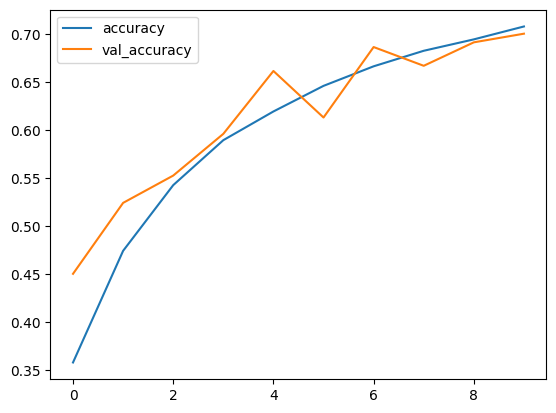

In [80]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()